In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("./CATA-Rút gọn thuật ngữ trà-LSC-2024_04_19.xlsx", sheet_name="rutgon1")
df

,Consumer,Product,Liking,Màu vàng nhạt,Màu cánh gián,Màu vàng,Màu vàng nâu,Màu hổ phách,Mùi đường,Mùi lá trà tươi,...,Hương mật ong,Hương ngọt,Vị chua,Vị chát,Vị thanh,Vị trà,Vị đắng,Vị ngọt lợ,Vị ngọt,Cảm giác gắt cổ
0,20,233,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,15,710,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,28,628,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,26,309,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,309,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,25,id,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
176,27,id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
177,23,id,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN
178,19,id,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN


In [3]:
df = df.fillna(0)

In [4]:
def penalty_cata(df, att):
    df3 = []
    att = att
    for i in df['Consumer'].unique():
        X = df[df['Consumer'] == i]
        att_like_ideal = X[X['Product'] == 'id'][att].values[0]
        if(att_like_ideal == 1):
            df3.append(np.where(X[att] == att_like_ideal, 1, 0))
        else:
            df3.append(np.where(X[att] == att_like_ideal, 2, 3))
    df['fix'] = np.array(df3).flatten()
    df1 = df[df['Product'] != 'Ideal']

    mean_drop = df1[df1['fix'] == 1]['Liking'].mean() - df1[df1['fix'] == 0]['Liking'].mean()
    t_statistic, p_value = stats.ttest_ind(np.array(df1[df1['fix'] == 1]['Liking']), np.array(df1[df1['fix'] == 0]['Liking']))
    return df1, mean_drop, p_value

In [5]:
df.columns

Index(['Consumer', 'Product', 'Liking', 'Màu vàng nhạt', 'Màu cánh gián',
       'Màu vàng', 'Màu vàng nâu', 'Màu hổ phách', 'Mùi đường',
       'Mùi lá trà tươi', 'Mùi lá trà khô', 'Mùi hắc', 'Hương sả', 'Hương tắc',
       'Hương chanh', 'Hương hoa nhài', 'Hương mật ong', 'Hương ngọt',
       'Vị chua', 'Vị chát', 'Vị thanh', 'Vị trà', 'Vị đắng', 'Vị ngọt lợ',
       'Vị ngọt', 'Cảm giác gắt cổ'],
      dtype='object')

In [6]:
df4 = pd.DataFrame(columns=['Thuộc tính', 'Level', 'Tần số', 'Percent', 'Liking_mean', 'Mean_drop', 'p_value', "significant"])


for j in ['Màu vàng nhạt', 'Màu cánh gián',
       'Màu vàng', 'Màu vàng nâu', 'Màu hổ phách', 'Mùi đường',
       'Mùi lá trà tươi', 'Mùi lá trà khô', 'Mùi hắc', 'Hương sả', 'Hương tắc',
       'Hương chanh', 'Hương hoa nhài', 'Hương mật ong', 'Hương ngọt',
       'Vị chua', 'Vị chát', 'Vị thanh', 'Vị trà', 'Vị đắng', 'Vị ngọt lợ',
       'Vị ngọt', 'Cảm giác gắt cổ']:
    att = j
    df10,_,_ = penalty_cata(df,att)
    mean_drop1 = df10[df10['fix'] == 1]['Liking'].mean() - df10[df10['fix'] == 0]['Liking'].mean()
    t_statistic1, p_value1 = stats.ttest_ind(np.array(df10[df10['fix'] == 1]['Liking']), np.array(df10[df10['fix'] == 0]['Liking']))
    percent1 = len(df10[df10['fix'] == 0])*100/len(df10)
    percent2 = len(df10[df10['fix'] == 1])*100/len(df10)
    if (percent1 >=20) and (p_value1 < 0.05):
        sig1 = 1
    else: 
        sig1 = 0

    mean_drop2 = df10[df10['fix'] == 3]['Liking'].mean() - df10[df10['fix'] == 2]['Liking'].mean()
    t_statistic2, p_value2 = stats.ttest_ind(np.array(df10[df10['fix'] == 3]['Liking']), np.array(df10[df10['fix'] == 2]['Liking']))
    percent3 = len(df10[df10['fix'] == 2])*100/len(df10)
    percent4 = len(df10[df10['fix'] == 3])*100/len(df10)
    if (percent3 >=20) and (p_value2 < 0.05):
        sig2 = 1
    else: 
        sig2 = 0


    a = np.array([att, "Phải có", len(df10[df10['fix'] == 0]), percent1, 
                 df10[df10['fix'] == 0]['Liking'].mean(), mean_drop1, p_value1, sig1])
    df4 = pd.concat([df4, pd.DataFrame([a], columns=['Thuộc tính', 'Level', 'Tần số', 'Percent', 'Liking_mean', 'Mean_drop', 'p_value', "significant"])], ignore_index=True, axis=0)
    b = np.array([att, "Có thì tốt", len(df10[df10['fix'] == 1]), percent2, 
                 df10[df10['fix'] == 1]['Liking'].mean(), mean_drop1, p_value1, sig1])    
    df4 = pd.concat([df4, pd.DataFrame([b], columns=['Thuộc tính', 'Level', 'Tần số', 'Percent', 'Liking_mean', 'Mean_drop', 'p_value', "significant"])], ignore_index=True, axis=0)
    c = np.array([att, "Có thì tốt", len(df10[df10['fix'] == 2]), percent3, 
                 df10[df10['fix'] == 2]['Liking'].mean(), mean_drop2, p_value2, sig2])
    df4 = pd.concat([df4, pd.DataFrame([c], columns=['Thuộc tính', 'Level', 'Tần số', 'Percent', 'Liking_mean', 'Mean_drop', 'p_value', "significant"])], ignore_index=True, axis=0)
    d = np.array([att, "Không được có", len(df10[df10['fix'] == 3]), percent4, 
                 df10[df10['fix'] == 3]['Liking'].mean(), mean_drop2, p_value2, sig2])    
    df4 = pd.concat([df4, pd.DataFrame([d], columns=['Thuộc tính', 'Level', 'Tần số', 'Percent', 'Liking_mean', 'Mean_drop', 'p_value', "significant"])], ignore_index=True, axis=0)



C:\Users\LeTuanPhuc\AppData\Local\Temp\ipykernel_11820\2221713194.py:15: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_statistic, p_value = stats.ttest_ind(np.array(df1[df1['fix'] == 1]['Liking']), np.array(df1[df1['fix'] == 0]['Liking']))
C:\Users\LeTuanPhuc\AppData\Local\Temp\ipykernel_11820\85197295.py:13: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_statistic1, p_value1 = stats.ttest_ind(np.array(df10[df10['fix'] == 1]['Liking']), np.array(df10[df10['fix'] == 0]['Liking']))


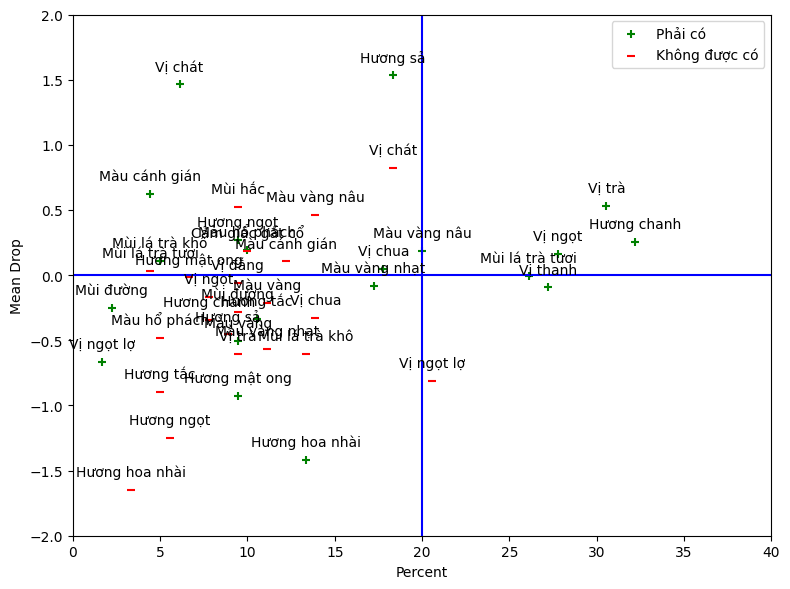

In [9]:
XX = df4[(df4['Level'] == 'Phải có')]
XX = XX[XX['Tần số'] != '0']
XX = XX.reset_index()
XX['Percent'] = XX['Percent'].astype('float')
XX['Mean_drop'] = XX['Mean_drop'].astype('float')
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(XX['Percent'], XX['Mean_drop'], color='green', marker="+")

# Add data labels
for i, txt in enumerate(XX['Thuộc tính']):
    plt.annotate(txt, (XX['Percent'][i], XX['Mean_drop'][i]), textcoords="offset points", xytext=(0, 10), ha='center')

XX2 = df4[(df4['Level'] == 'Không được có')]
XX2 = XX2[XX2['Tần số'] != '0']
XX2 = XX2.reset_index()
XX2['Percent'] = XX2['Percent'].astype('float')
XX2['Mean_drop'] = XX2['Mean_drop'].astype('float')

plt.scatter(XX2['Percent'], XX2['Mean_drop'], color='red', marker="_")
# Add data labels
for i, txt in enumerate(XX2['Thuộc tính']):
    plt.annotate(txt, (XX2['Percent'][i], XX2['Mean_drop'][i]), textcoords="offset points", xytext=(0, 10), ha='center')


# Add labels and title
plt.xlabel('Percent')
plt.ylabel('Mean Drop')
#plt.title('Scatter Plot of Percent vs. Mean Drop')

plt.axvline(x=20, color='blue')
plt.axhline(y=0, color='blue')
plt.xlim(0,40)
plt.ylim(-2,2)
# Show plot
#plt.grid(True)
plt.tight_layout()
plt.legend(['Phải có', "Không được có"])
plt.show()

In [174]:
df10[df10['fix'] == 3]['Liking'].mean() - df10[df10['fix'] == 2]['Liking'].mean()

-0.9879832810867297

In [ ]:
df['fix'] = np.array(df3).flatten()
df1 = df[df['Product'] != 'Ideal']

mean_drop = df1[df1['fix'] == 1]['Liking'].mean() - df1[df1['fix'] == 0]['Liking'].mean()
t_statistic, p_value = stats.ttest_ind(np.array(df1[df1['fix'] == 1]['Liking']), np.array(df1[df1['fix'] == 0]['Liking']))
p_value

In [149]:
df10[df10['fix'] == 1]['Liking'].mean() - df10[df10['fix'] == 0]['Liking'].mean()

1.59375

In [172]:
df10['fix'].value_counts()

fix
2    522
3     33
0     32
1      8
Name: count, dtype: int64

In [163]:
len(df10[df10['fix'] == 0])

32

In [165]:
32/len(df10)

0.05378151260504202